In [2]:
import gensim
import numpy as np
import pandas as pd
import os
import re
import csv
import codecs
import sys
import pickle
import keras, tensorflow
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split

from keras import callbacks
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout, BatchNormalization, Activation, Bidirectional
from keras.layers.merge import concatenate
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.text import text_to_word_sequence, Tokenizer
from keras.preprocessing.sequence import pad_sequences

import matplotlib as mpl
%matplotlib inline
from matplotlib import pyplot as plt
from keras.utils import plot_model 
from IPython.display import Image
import pydot
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import tensorflow as tf


from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from string import punctuation

from keras import backend as K
from keras.engine.topology import Layer
#from keras import initializations
from keras import initializers, regularizers, constraints



#biodirectional embedding


/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [13]:
sys.version


'3.6.6 (default, Jul 19 2018, 14:25:17) \n[GCC 8.1.1 20180712 (Red Hat 8.1.1-5)]'

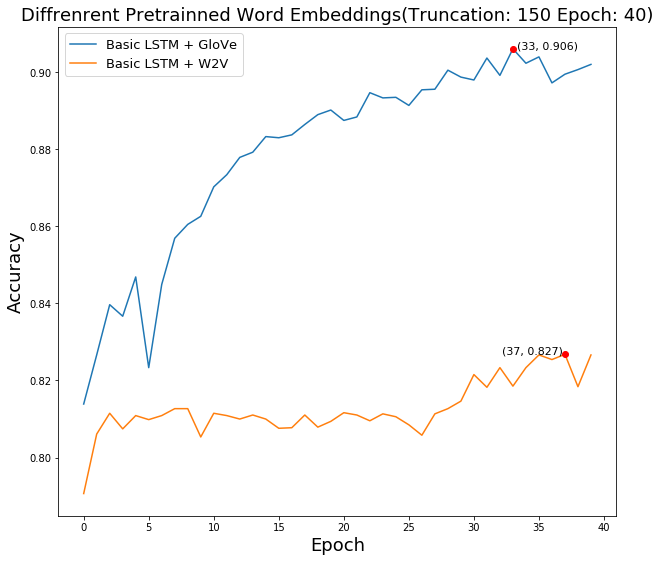

In [100]:
file1 = open('./history/history(lstm_epoch40_150_lr0.001_trainable)', 'rb')
history1 = pickle.load(file1)
file1.close()

file2 = open("../history/history(lstm_w2v_150_lr0.001_trainable)",'rb')
history2 = pickle.load(file2)
file2.close()


fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)
ax.plot(history1['val_acc'])
ax.plot(history2['val_acc'])


ymax1 = max(history1['val_acc'])
xmax1 = history1['val_acc'].index(ymax1)

ymax2 = max(history2['val_acc'])
xmax2 = history2['val_acc'].index(ymax2)


plt.plot(xmax1,ymax1,'ro')
plt.text(xmax1*1.01, ymax1*1.00 , '(%d, %.3f)'%(xmax1,ymax1), fontsize=11)

plt.plot(xmax2,ymax2,'ro')
plt.text(xmax2*0.87, ymax2*1 , '(%d, %.3f)'%(xmax2,ymax2), fontsize=11)


plt.title('Diffrenrent Pretrainned Word Embeddings(Truncation: 150 Epoch: 40)', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.legend(['Basic LSTM + GloVe', 'Basic LSTM + W2V'], loc='upper left',fontsize=13)
plt.savefig("W2V+GloVe.png")

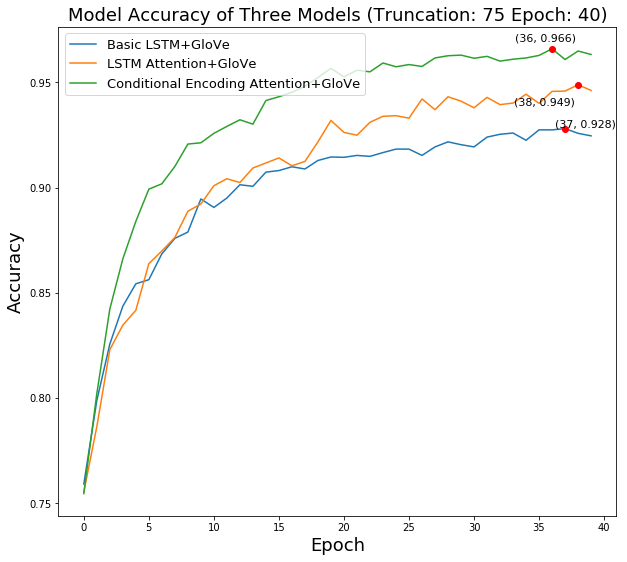

In [8]:
file1 = open('./history/history(lstm_epoch40_75_lr0.001_trainable)', 'rb')
history1 = pickle.load(file1)
file1.close()

file2 = open("../history/history(attention_75_lr0.0005_trainable)",'rb')
history2 = pickle.load(file2)
file2.close()

file3 = open("../history/history(mask_conditional_epoch40_75_lr0.001_trainable)",'rb')
history3 = pickle.load(file3)
file3.close()


fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)
ax.plot(history1['val_acc'])
ax.plot(history2['val_acc'])
ax.plot(history3['val_acc'])

ymax1 = max(history1['val_acc'])
xmax1 = history1['val_acc'].index(ymax1)

ymax2 = max(history2['val_acc'])
xmax2 = history2['val_acc'].index(ymax2)

ymax3 = max(history3['val_acc'])
xmax3 = history3['val_acc'].index(ymax3)

plt.plot(xmax1,ymax1,'ro')
plt.text(xmax1*0.98, ymax1*1.001 , '(%d, %.3f)'%(xmax1,ymax1), fontsize=11)

plt.plot(xmax2,ymax2,'ro')
plt.text(xmax2*0.87, ymax2*0.99 , '(%d, %.3f)'%(xmax2,ymax2), fontsize=11)

plt.plot(xmax3,ymax3,'ro')
plt.text(xmax3*0.92, ymax3*1.004 , '(%d, %.3f)'%(xmax3,ymax3), fontsize=11)


plt.title('Model Accuracy of Three Models (Truncation: 75 Epoch: 40)', fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Epoch',fontsize=18)
plt.legend(['Basic LSTM+GloVe', 'LSTM Attention+GloVe', 'Conditional Encoding Attention+GloVe'], loc='upper left',fontsize=13)
plt.savefig("Three Model COMPARISON_75.png")

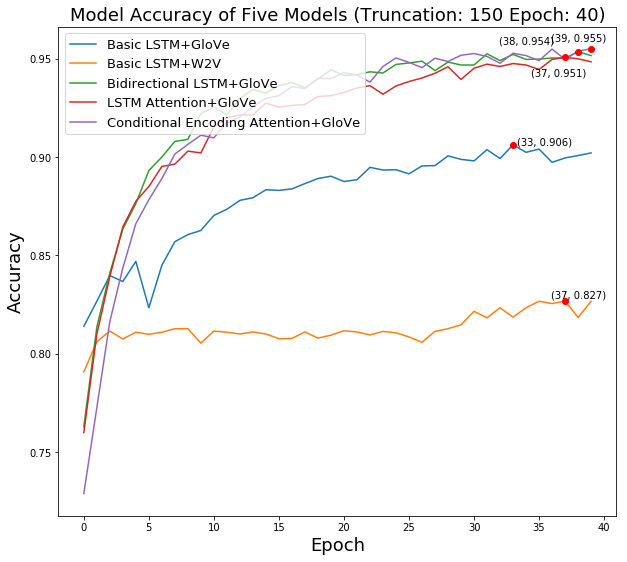

In [133]:
file1 = open('./history/history(lstm_epoch40_150_lr0.001_trainable)', 'rb')
history1 = pickle.load(file1)
file1.close()

file2 = open('../history/history(lstm_w2v_150_lr0.001_trainable)', 'rb')
history2 = pickle.load(file2)
file2.close()

file3 = open("../history/history(bidirectional_lstm_epoch40_150_lr0.001_trainable)",'rb')
history3 = pickle.load(file3)
file3.close()

file4 = open("./history/history(attention_epoch40_150_lr0.001_trainable)",'rb')
history4 = pickle.load(file4)
file4.close()

file5 = open("../history/history(mask_conditional_epoch40_150_lr0.001_trainable)",'rb')
history5 = pickle.load(file5)
file5.close()

fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)
ax.plot(history1['val_acc'])
ax.plot(history2['val_acc'])
ax.plot(history3['val_acc'])
ax.plot(history4['val_acc'])
ax.plot(history5['val_acc'])

ymax1 = max(history1['val_acc'])
xmax1 = history1['val_acc'].index(ymax1)

ymax2 = max(history2['val_acc'])
xmax2 = history2['val_acc'].index(ymax2)

ymax3 = max(history3['val_acc'])
xmax3 = history3['val_acc'].index(ymax3)

ymax4 = max(history4['val_acc'])
xmax4 = history4['val_acc'].index(ymax4)

ymax5 = max(history5['val_acc'])
xmax5 = history5['val_acc'].index(ymax5)

plt.plot(xmax1,ymax1,'ro')
plt.text(xmax1*1.01, ymax1*1.00 , '(%d, %.3f)'%(xmax1,ymax1), fontsize=10)

plt.plot(xmax2,ymax2,'ro')
plt.text(xmax2*0.97, ymax2*1.002 , '(%d, %.3f)'%(xmax2,ymax2), fontsize=10)

plt.plot(xmax3,ymax3,'ro')
plt.text(xmax3*0.84, ymax3*1.004 , '(%d, %.3f)'%(xmax3,ymax3), fontsize=10)

plt.plot(xmax4,ymax4,'ro')
plt.text(xmax4*0.93, ymax4*0.99 , '(%d, %.3f)'%(xmax4,ymax4), fontsize=10)

plt.plot(xmax5,ymax5,'ro')
plt.text(xmax5*0.92, ymax5*1.004 , '(%d, %.3f)'%(xmax5,ymax5), fontsize=10)

plt.title('Model Accuracy of Five Models (Truncation: 150 Epoch: 40)',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Epoch',fontsize=18)
plt.legend(['Basic LSTM+GloVe','Basic LSTM+W2V','Bidirectional LSTM+GloVe','LSTM Attention+GloVe', 'Conditional Encoding Attention+GloVe'], loc='upper left',fontsize=13)
plt.savefig("Five Model Comparison_150.png")

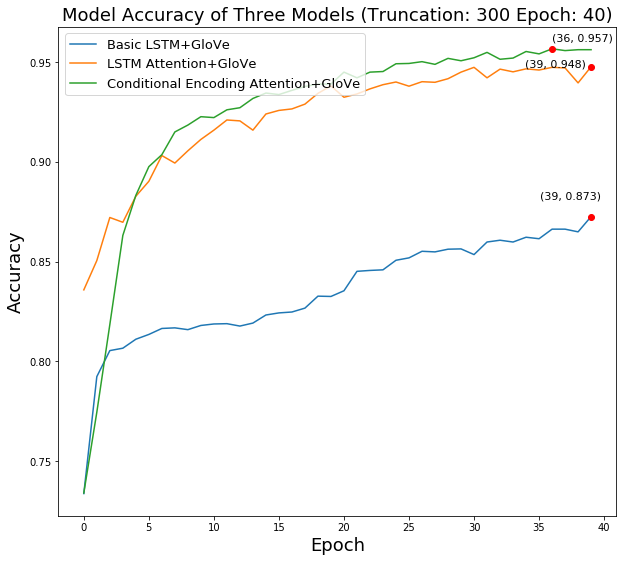

In [110]:
file1 = open('../history/history(lstm_epoch40_300_lr0.001_trainable)', 'rb')
history1 = pickle.load(file1)
file1.close()

file2 = open("../history/history(attention_epoch40_300_lr0.001_trainable)",'rb')
history2 = pickle.load(file2)
file2.close()

file3 = open("../history/history(mask_conditional_epoch40_300_lr0.001_trainable)",'rb')
history3 = pickle.load(file3)
file3.close()


fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)
ax.plot(history1['val_acc'])
ax.plot(history2['val_acc'])
ax.plot(history3['val_acc'])

ymax1 = max(history1['val_acc'])
xmax1 = history1['val_acc'].index(ymax1)

ymax2 = max(history2['val_acc'])
xmax2 = history2['val_acc'].index(ymax2)

ymax3 = max(history3['val_acc'])
xmax3 = history3['val_acc'].index(ymax3)

plt.plot(xmax1,ymax1,'ro')
plt.text(xmax1*0.90, ymax1*1.01 , '(%d, %.3f)'%(xmax1,ymax1), fontsize=11)

plt.plot(xmax2,ymax2,'ro')
plt.text(xmax2*0.87, ymax2*1 , '(%d, %.3f)'%(xmax2,ymax2), fontsize=11)

plt.plot(xmax3,ymax3,'ro')
plt.text(xmax3*1, ymax3*1.004 , '(%d, %.3f)'%(xmax3,ymax3), fontsize=11)


plt.title('Model Accuracy of Three Models (Truncation: 300 Epoch: 40)',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.legend(['Basic LSTM+GloVe', 'LSTM Attention+GloVe', 'Conditional Encoding Attention+GloVe'], loc='upper left',fontsize=13)
plt.savefig("Three Model COMPARISON_300.png")

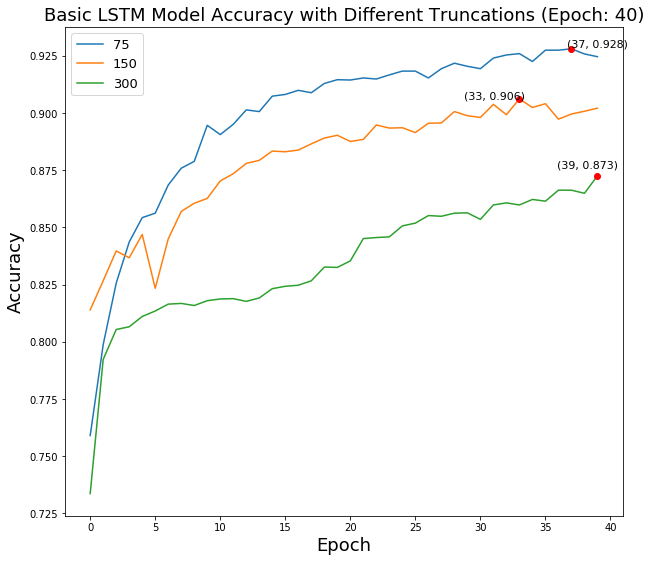

In [98]:
file1 = open('./history/history(lstm_epoch40_75_lr0.001_trainable)', 'rb')
history1 = pickle.load(file1)
file1.close()

file2 = open("./history/history(lstm_epoch40_150_lr0.001_trainable)",'rb')
history2 = pickle.load(file2)
file2.close()

file3 = open("../history/history(lstm_epoch40_300_lr0.001_trainable)",'rb')
history3 = pickle.load(file3)
file3.close()


fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)
ax.plot(history1['val_acc'])
ax.plot(history2['val_acc'])
ax.plot(history3['val_acc'])

ymax1 = max(history1['val_acc'])
xmax1 = history1['val_acc'].index(ymax1)

ymax2 = max(history2['val_acc'])
xmax2 = history2['val_acc'].index(ymax2)

ymax3 = max(history3['val_acc'])
xmax3 = history3['val_acc'].index(ymax3)

plt.plot(xmax1,ymax1,'ro')
plt.text(xmax1*0.99, ymax1*1.001 , '(%d, %.3f)'%(xmax1,ymax1), fontsize=11)

plt.plot(xmax2,ymax2,'ro')
plt.text(xmax2*0.87, ymax2*1 , '(%d, %.3f)'%(xmax2,ymax2), fontsize=11)

plt.plot(xmax3,ymax3,'ro')
plt.text(xmax3*0.92, ymax3*1.004 , '(%d, %.3f)'%(xmax3,ymax3), fontsize=11)


plt.title('Basic LSTM Model Accuracy with Different Truncations (Epoch: 40)',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Epoch',fontsize=18)
plt.legend(['75 ', '150', '300'], loc='upper left', fontsize=13)
plt.savefig("Diffrent Truncations with LSTM.png")

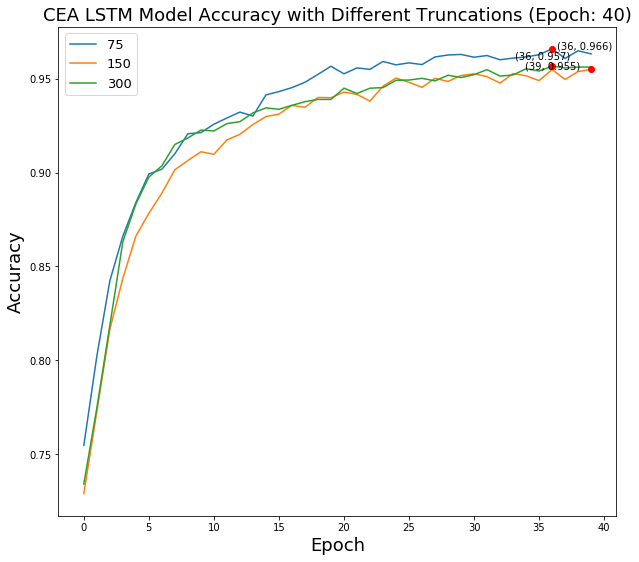

In [4]:
file1 = open('../history/history(mask_conditional_epoch40_75_lr0.001_trainable)', 'rb')
history1 = pickle.load(file1)
file1.close()

file2 = open("../history/history(mask_conditional_epoch40_150_lr0.001_trainable)",'rb')
history2 = pickle.load(file2)
file2.close()

file3 = open("../history/history(mask_conditional_epoch40_300_lr0.001_trainable)",'rb')
history3 = pickle.load(file3)
file3.close()


fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)
ax.plot(history1['val_acc'])
ax.plot(history2['val_acc'])
ax.plot(history3['val_acc'])

ymax1 = max(history1['val_acc'])
xmax1 = history1['val_acc'].index(ymax1)

ymax2 = max(history2['val_acc'])
xmax2 = history2['val_acc'].index(ymax2)

ymax3 = max(history3['val_acc'])
xmax3 = history3['val_acc'].index(ymax3)

plt.plot(xmax1,ymax1,'ro')
plt.text(xmax1*1.01, ymax1*1.00 , '(%d, %.3f)'%(xmax1,ymax1), fontsize=10)

plt.plot(xmax2,ymax2,'ro')
plt.text(xmax2*0.87, ymax2*1 , '(%d, %.3f)'%(xmax2,ymax2), fontsize=10)

plt.plot(xmax3,ymax3,'ro')
plt.text(xmax3*0.92, ymax3*1.004 , '(%d, %.3f)'%(xmax3,ymax3), fontsize=10)


plt.title('CEA LSTM Model Accuracy with Different Truncations (Epoch: 40)',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Epoch',fontsize=18)
plt.legend(['75 ', '150', '300'], loc='upper left',fontsize=13)
plt.savefig("CEA.png",fontsize=18)

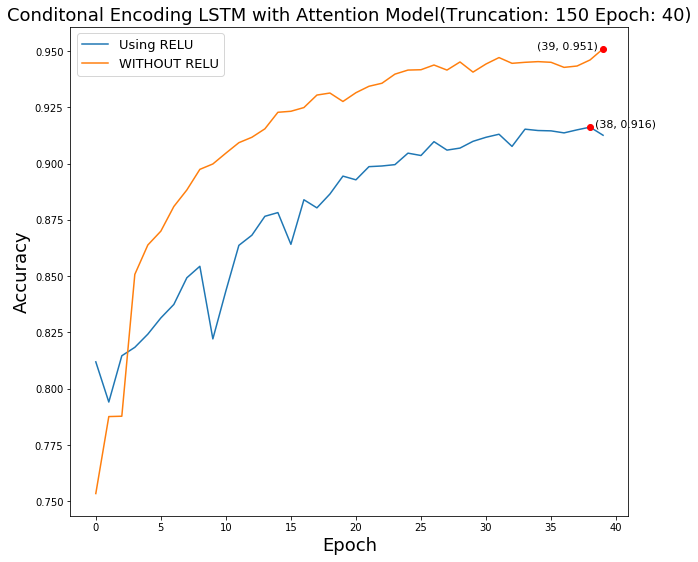

In [114]:
file1 = open('../history/history(relu_conditional_epoch40_150_lr0.001_trainable)', 'rb')
history1 = pickle.load(file1)
file1.close()

file2 = open("./history/history(conditional_epoch40_150_lr0.002_trainable)",'rb')
history2 = pickle.load(file2)
file2.close()


fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)
ax.plot(history1['val_acc'])
ax.plot(history2['val_acc'])


ymax1 = max(history1['val_acc'])
xmax1 = history1['val_acc'].index(ymax1)

ymax2 = max(history2['val_acc'])
xmax2 = history2['val_acc'].index(ymax2)


plt.plot(xmax1,ymax1,'ro')
plt.text(xmax1*1.01, ymax1*1.00 , '(%d, %.3f)'%(xmax1,ymax1), fontsize=11)

plt.plot(xmax2,ymax2,'ro')
plt.text(xmax2*0.87, ymax2*1 , '(%d, %.3f)'%(xmax2,ymax2), fontsize=11)


plt.title('Conditonal Encoding LSTM with Attention Model(Truncation: 150 Epoch: 40)',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Epoch',fontsize=18)
plt.legend(['Using RELU', 'WITHOUT RELU'], loc='upper left',fontsize=13)
plt.savefig("CONDITIONAL-RELU.png")

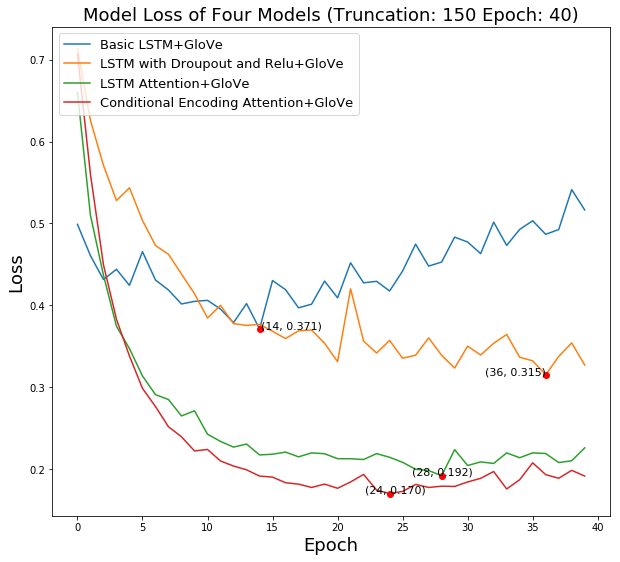

In [134]:
file1 = open("./history/history(lstm_epoch40_150_lr0.001_trainable)",'rb')
history1 = pickle.load(file1)
file1.close()

file2 = open("../history/history(lstm_dropout+relu_epoch40_150_lr0.002_trainable)",'rb')
history2 = pickle.load(file2)
file2.close()

file3 = open("./history/history(attention_epoch40_150_lr0.001_trainable)",'rb')
history3 = pickle.load(file3)
file3.close()

file4 = open('../history/history(mask_conditional_epoch40_150_lr0.001_trainable)', 'rb')
history4 = pickle.load(file4)
file4.close()

fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)
ax.plot(history1['val_loss'])
ax.plot(history2['val_loss'])
ax.plot(history3['val_loss'])
ax.plot(history4['val_loss'])

ymin1 = min(history1['val_loss'])
xmin1 = history1['val_loss'].index(ymin1)

ymin2 = min(history2['val_loss'])
xmin2 = history2['val_loss'].index(ymin2)

ymin3 = min(history3['val_loss'])
xmin3 = history3['val_loss'].index(ymin3)

ymin4 = min(history4['val_loss'])
xmin4 = history4['val_loss'].index(ymin4)

plt.plot(xmin1,ymin1,'ro')
plt.text(xmin1*1.01, ymin1*1.00 , '(%d, %.3f)'%(xmin1,ymin1), fontsize=11)

plt.plot(xmin2,ymin2,'ro')
plt.text(xmin2*0.87, ymin2*1 , '(%d, %.3f)'%(xmin2,ymin2), fontsize=11)

plt.plot(xmin3,ymin3,'ro')
plt.text(xmin3*0.92, ymin3*1.004 , '(%d, %.3f)'%(xmin3,ymin3), fontsize=11)

plt.plot(xmin4,ymin4,'ro')
plt.text(xmin4*0.92, ymin4*1.004 , '(%d, %.3f)'%(xmin4,ymin4), fontsize=11)

plt.title('Model Loss of Four Models (Truncation: 150 Epoch: 40)',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.xlabel('Epoch',fontsize=18)
plt.legend(['Basic LSTM+GloVe', 'LSTM with Droupout and Relu+GloVe','LSTM Attention+GloVe', 'Conditional Encoding Attention+GloVe'], loc='upper left',fontsize=13)
plt.savefig("Four Model COMPARISON_150_loss.png")

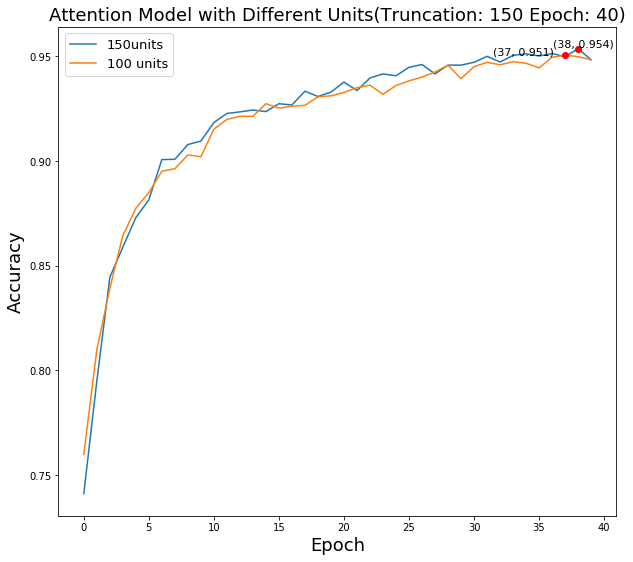

In [122]:
file1 = open('./history/history(attention_150units_epoch40_150_lr0.001_trainable)', 'rb')
history1 = pickle.load(file1)
file1.close()

file2 = open("./history/history(attention_epoch40_150_lr0.001_trainable)",'rb')
history2 = pickle.load(file2)
file2.close()


fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)
ax.plot(history1['val_acc'])
ax.plot(history2['val_acc'])


ymax1 = max(history1['val_acc'])
xmax1 = history1['val_acc'].index(ymax1)

ymax2 = max(history2['val_acc'])
xmax2 = history2['val_acc'].index(ymax2)


plt.plot(xmax1,ymax1,'ro')
plt.text(xmax1*0.95, ymax1*1.001 , '(%d, %.3f)'%(xmax1,ymax1), fontsize=11)

plt.plot(xmax2,ymax2,'ro')
plt.text(xmax2*0.85, ymax2*1.0001 , '(%d, %.3f)'%(xmax2,ymax2), fontsize=11)


plt.title('Attention Model with Different Units(Truncation: 150 Epoch: 40)',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Epoch',fontsize=18)
plt.legend(['150units', '100 units'], loc='upper left',fontsize=13)
plt.savefig("Different-units-attention.png")

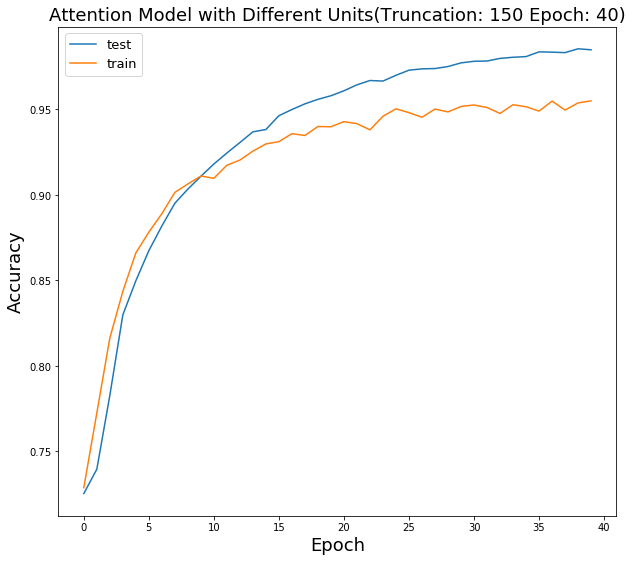

In [123]:
#overfit
file1 = open('../history/history(mask_conditional_epoch40_150_lr0.001_trainable)', 'rb')
history1 = pickle.load(file1)
file1.close()


fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)
ax.plot(history1['acc'])
ax.plot(history1["val_acc"])


plt.title('Attention Model with Different Units(Truncation: 150 Epoch: 40)',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Epoch',fontsize=18)
plt.legend(['test', 'train'], loc='upper left',fontsize=13)


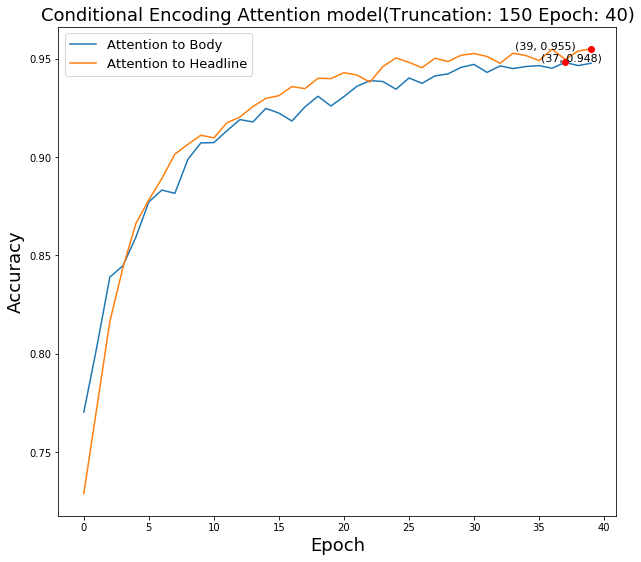

In [6]:
file1 = open('./history/history(shift_conditional_epoch40_150_lr0.002_trainable)', 'rb')
history1 = pickle.load(file1)
file1.close()

file2 = open("../history/history(mask_conditional_epoch40_150_lr0.001_trainable)",'rb')
history2 = pickle.load(file2)
file2.close()


fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)
ax.plot(history1['val_acc'])
ax.plot(history2['val_acc'])


ymax1 = max(history1['val_acc'])
xmax1 = history1['val_acc'].index(ymax1)

ymax2 = max(history2['val_acc'])
xmax2 = history2['val_acc'].index(ymax2)


plt.plot(xmax1,ymax1,'ro')
plt.text(xmax1*0.95, ymax1*1.001 , '(%d, %.3f)'%(xmax1,ymax1), fontsize=11)

plt.plot(xmax2,ymax2,'ro')
plt.text(xmax2*0.85, ymax2*1.0001 , '(%d, %.3f)'%(xmax2,ymax2), fontsize=11)


plt.title('Conditional Encoding Attention model(Truncation: 150 Epoch: 40)',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Epoch',fontsize=18)
plt.legend(['Attention to Body', 'Attention to Headline'], loc='upper left',fontsize=13)
plt.savefig("cea-attention.png")